<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/SDS/SDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1>Amazon Book Reviews &#128218;**

<h2>Prepared by:</h2>
<li>Goo Ye Jui [A20EC0191]</li>
<li>Ong Han Wah [A20EC0129]</li>
<li>Maizatul Afrina Safiah binti Saiful Azwan [A20EC0204]</li>



---



<h2>Dataset Description</h2>
<p>This dataset contain the feedback about 3M user on 212404 unique books. It contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014 and this file has these attributes.</p>
<table>
  <tr>
    <th>Columns</th>
    <th>Description</th>
  </tr>
  <tr>
    <th>Id</th>
    <th>The Id of the book</th>
  </tr>
  <tr>
    <th>Title</th>
    <th>The title of the book</th>
  </tr>
  <tr>
    <th>Price</th>
    <th>The price of the book</th>
  </tr>
  <tr>
    <th>User_id</th>
    <th>Id of the user</th>
  </tr>
  <tr>
    <th>profileName</th>
    <th>Name of the user</th>
  </tr>
  <tr>
    <th>review/helpfulness</th>
    <th>Helpfulness rating</th>
  </tr>
  <tr>
    <th>review/score</th>
    <th>Book's rating</th>
  </tr>
  <tr>
    <th>review/time</th>
    <th>Time given for review</th>
  </tr>
  <tr>
    <th>review/summary</th>
    <th>Review summary</th>
  </tr>
  <tr>
    <th>review/text</th>
    <th>Full text review</th>
  </tr>
</table>



# Downloading the Dataset

In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1D4OR2U9aXTL5OMjMQ_lDRzA3KP19XjKK/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Books_rating.csv') 

In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1oZSQs2VtTEmT-h0WA12GKmhcCOwzUUat/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('books_data.csv') 

In [ ]:
#Import libraries
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%%time
df_rate = pd.read_csv('Books_rating.csv')
df_rate.head()

CPU times: user 31.3 s, sys: 2.52 s, total: 33.8 s
Wall time: 41.5 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
%%time
df_rate.tail()

CPU times: user 237 µs, sys: 35 µs, total: 272 µs
Wall time: 279 µs


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."
2999999,B000NSLVCU,The Idea of History,NaN,NaN,NaN,7/49,1.0,905385600,Collingwood's ideas sink in a quagmire or verb...,"The guy has a few good ideas but, reader, bewa..."


In [ ]:
%%time
df_data = pd.read_csv('books_data.csv')
df_data.head()

CPU times: user 2.78 s, sys: 222 ms, total: 3 s
Wall time: 3.36 s


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
%%time
df_data.tail()

CPU times: user 266 µs, sys: 0 ns, total: 266 µs
Wall time: 272 µs


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN


In [ ]:
%%time
book = pd.merge(df_rate,df_data, on = 'Title')
book.head()

CPU times: user 2.69 s, sys: 94.6 ms, total: 2.78 s
Wall time: 2.81 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


# Data Preparation and Cleaning

In [ ]:
%%time
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 457.8+ MB
CPU times: user 11.2 ms, sys: 1.04 ms, total: 12.2 ms
Wall time: 21.3 ms


In [ ]:
%%time
book.shape

CPU times: user 24 µs, sys: 5 µs, total: 29 µs
Wall time: 33.9 µs


(3000000, 19)

In [ ]:
%%time
book = book[['Id','Title','User_id','profileName','review/helpfulness','review/score','review/summary','review/text','authors','categories','publisher','ratingsCount']]
book.head()

CPU times: user 1.38 s, sys: 106 ms, total: 1.48 s
Wall time: 1.48 s


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,['Julie Strain'],['Comics & Graphic Novels'],NaN,NaN
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,['Philip Nel'],['Biography & Autobiography'],A&C Black,NaN
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",['Philip Nel'],['Biography & Autobiography'],A&C Black,NaN
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Philip Nel'],['Biography & Autobiography'],A&C Black,NaN
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,['Philip Nel'],['Biography & Autobiography'],A&C Black,NaN


In [ ]:
%%time
book.drop_duplicates(inplace = True)
book.shape

CPU times: user 11.4 s, sys: 47.2 ms, total: 11.4 s
Wall time: 11.9 s


(2990014, 12)

In [ ]:
%%time
book.dropna(inplace = True)
book.isna().sum()

CPU times: user 3.02 s, sys: 19 ms, total: 3.04 s
Wall time: 3.02 s


Id                    0
Title                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
authors               0
categories            0
publisher             0
ratingsCount          0
dtype: int64

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146365 entries, 47 to 2999998
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1146365 non-null  object 
 1   Title               1146365 non-null  object 
 2   User_id             1146365 non-null  object 
 3   profileName         1146365 non-null  object 
 4   review/helpfulness  1146365 non-null  object 
 5   review/score        1146365 non-null  float64
 6   review/summary      1146365 non-null  object 
 7   review/text         1146365 non-null  object 
 8   authors             1146365 non-null  object 
 9   categories          1146365 non-null  object 
 10  publisher           1146365 non-null  object 
 11  ratingsCount        1146365 non-null  float64
dtypes: float64(2), object(10)
memory usage: 113.7+ MB


In [ ]:
books = book.sample(100000)
books.shape

(100000, 12)

In [ ]:
# Removes bractes and colons from authors name
books['authors'] = books['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
books['categories'] = books['categories'].str.extract(r'\'(.*)\'')
# Counting the length of the each review
books['word_count'] = books['review/text'].apply(lambda x: len(x.split(' ')))

books.head()

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount,word_count
1671395,1587888432,Eleventh Hour (FBI Thriller),A8LT66GHJAOQY,"destiny morna ""destiny21""",1/1,4.0,The FBI series...continued.,This is the latest entry into Catherine Coulte...,Catherine Coulter,Fiction,Penguin,13.0,182
289252,0440229405,Shattered Mirror (Den of Shadows),A2RSY2GCHEJ6F5,andy,0/0,3.0,Not the best,"I thought this book was okay, but there was no...",Amelia Atwater-Rhodes,Young Adult Fiction,Delacorte Press,13.0,94
773715,B000I3NFKG,THE CATCHER IN THE RYE,A3TC8884LIBYFE,Sean P. Riley,2/4,5.0,People and their Response to The Catcher in th...,The Catcher in the Rye is a truly great book. ...,J.D. Salinger,Fiction,"Little, Brown",3179.0,72
679529,B000CSYUNS,A Death in the Family,A2E1EFNIZL2FVA,Rizzo &#9834;&#9834;,0/0,5.0,The novel just doesn't miss a beat!,"Pulitizer Prize winner, A Death In The Family ...",Tessa Wegert,Fiction,Penguin,4.0,357
636600,B000MK50EE,Goodnight Moon,AJUCZE4FYD4VH,"P. Elkin ""phil4000""",4/5,5.0,Simply the best bed-time book ever,We don't have fights over bedtime in our house...,Margaret Wise Brown,Juvenile Fiction,HarperCollins,193.0,101


In [ ]:

books['review/score'] = pd.to_numeric(books['review/score'], errors='coerce')

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1671395 to 331680
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  object 
 1   Title               100000 non-null  object 
 2   User_id             100000 non-null  object 
 3   profileName         100000 non-null  object 
 4   review/helpfulness  100000 non-null  object 
 5   review/score        100000 non-null  float64
 6   review/summary      100000 non-null  object 
 7   review/text         100000 non-null  object 
 8   authors             99348 non-null   object 
 9   categories          99791 non-null   object 
 10  publisher           100000 non-null  object 
 11  ratingsCount        100000 non-null  float64
 12  word_count          100000 non-null  int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 10.7+ MB


# Exploratory Analysis and Visualization (Question & Answer)


In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kaleido.scopes.plotly import PlotlyScope
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

####**Question 1:** Which category has the most numbers of books? List the Top 3 categories.

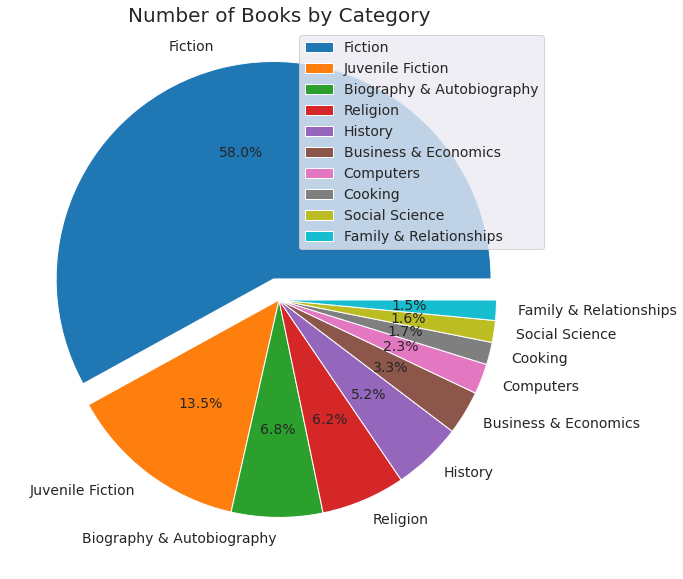

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(books['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%')
plt.title('Number of Books by Category', fontsize = 20)
plt.axis('off')
plt.legend(loc='upper right')
plt.show()

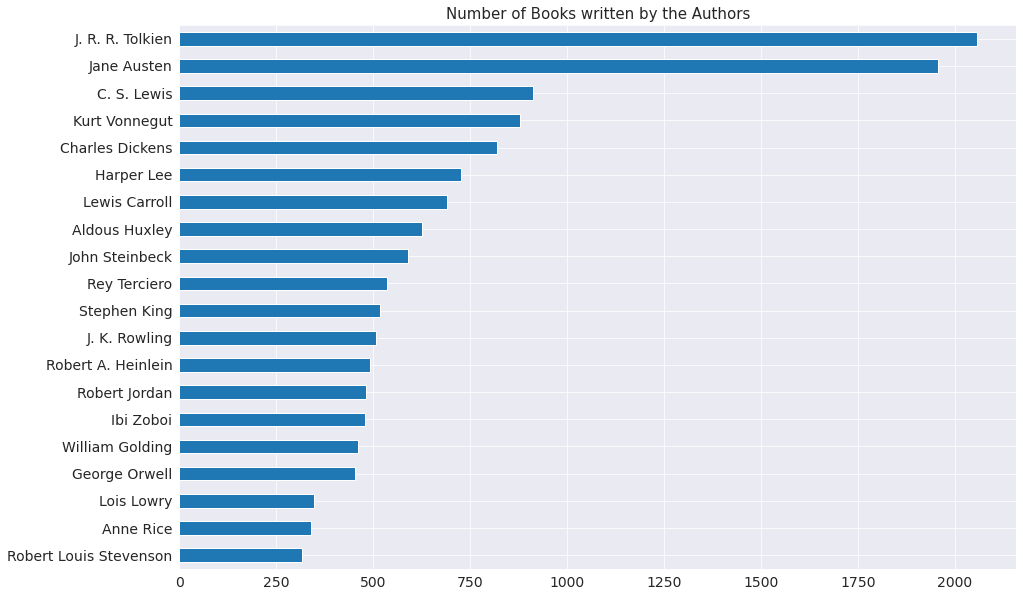

In [ ]:
books['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

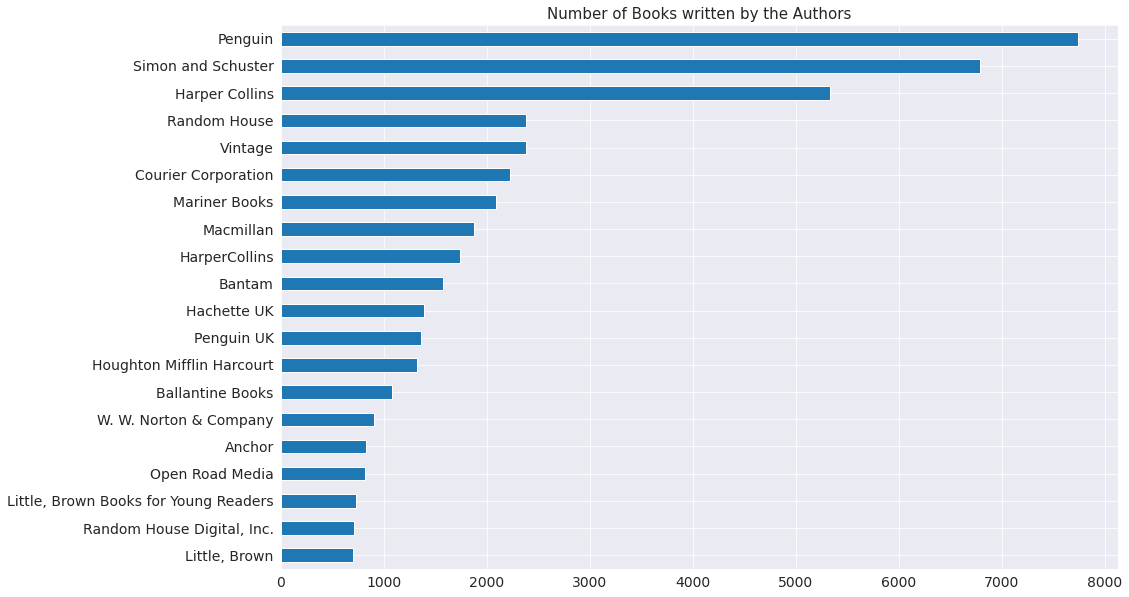

In [ ]:
books['publisher'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

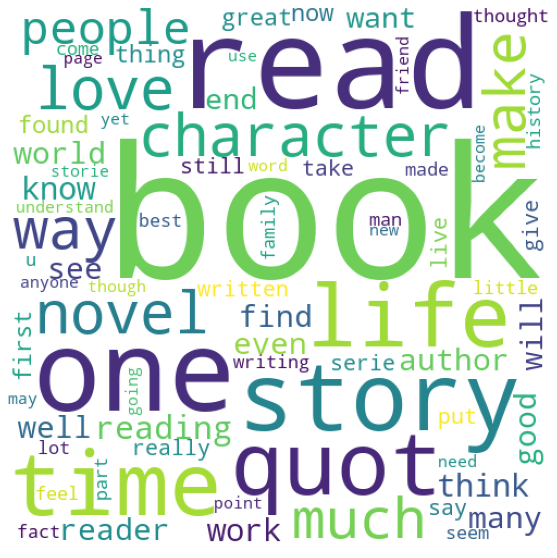

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(books[books['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

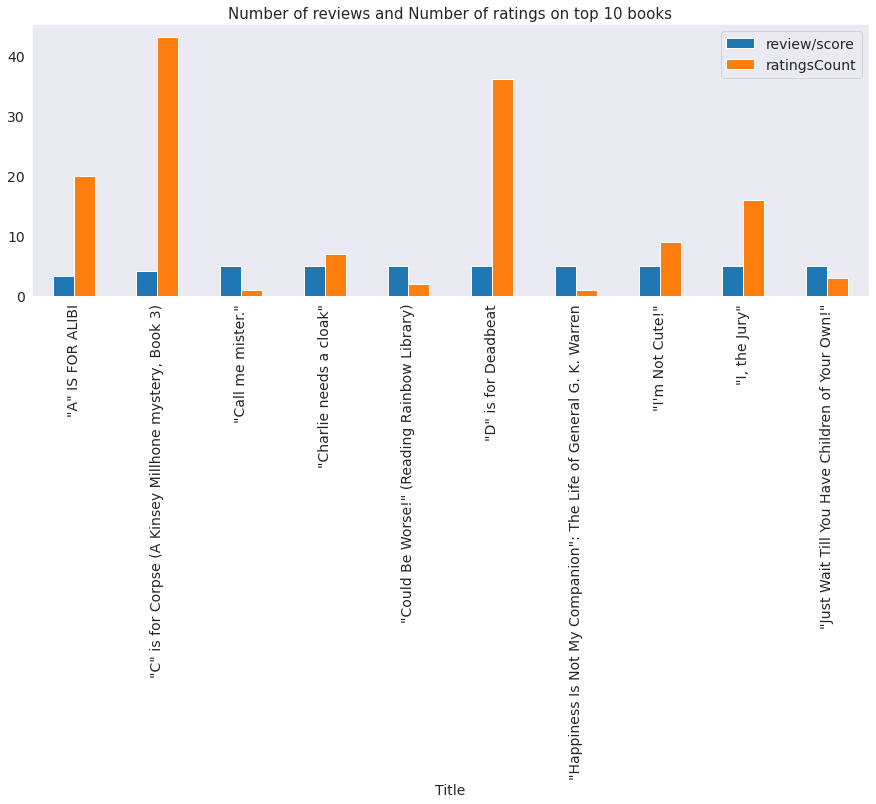

In [ ]:
books.groupby('Title').mean()[['review/score', 'ratingsCount']].head(10).plot(kind='bar', figsize=(15,5))
plt.title('Number of reviews and Number of ratings on top 10 books', fontsize = 15)
plt.grid()
plt.show()